### Fit S21 traces for R1_F1_4p15

In [8]:
from pathlib import Path
from rrfit.hangerfit import fit_s21_v2
from betata.resonator_studies.trace import Trace, load_traces, save_traces

CWD = Path.cwd()

Specify input folder and output file

In [9]:
resonator_name = "R1_F1_4p15"
input_folder = CWD / f"data/resonator_studies/{resonator_name}"
output_file = CWD / f"out/resonator_studies/{resonator_name}.h5"

Load traces

In [10]:
traces: list[Trace] = load_traces(input_folder)

Fit traces

[[Model]]
    Model(S21Model)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 26
    # data points      = 480
    # variables        = 4
    chi-square         = 0.02054238
    reduced chi-square = 4.3156e-05
    Akaike info crit   = -4820.34458
    Bayesian info crit = -4803.64943
    R-squared          = np.complex128(693077201655.9308-98810884202.26387j)
[[Variables]]
    fr:     4.1510e+09 +/- 14.5760245 (0.00%) (init = 4.150964e+09)
    Ql:     372464.847 +/- 972.727053 (0.26%) (init = 434696.5)
    absQc:  693606.821 +/- 1537.07152 (0.22%) (init = 809163.8)
    phi:    0.93316691 +/- 0.00222139 (0.24%) (init = 0.9331679)
    a:      1 (fixed)
    alpha:  0 (fixed)
    tau:    0 (fixed)
    Qi:     547476.938 +/- 1971.79182 (0.36%) == '1 / ((1 / Ql) - (cos(phi) / absQc))'
[[Correlations]] (unreported correlations are < 0.100)
    C(fr, phi)   = -0.8500
    C(Ql, absQc) = +0.8479
    C(Ql, phi)   = -0.1812
    C(fr, absQc) = -0.1630


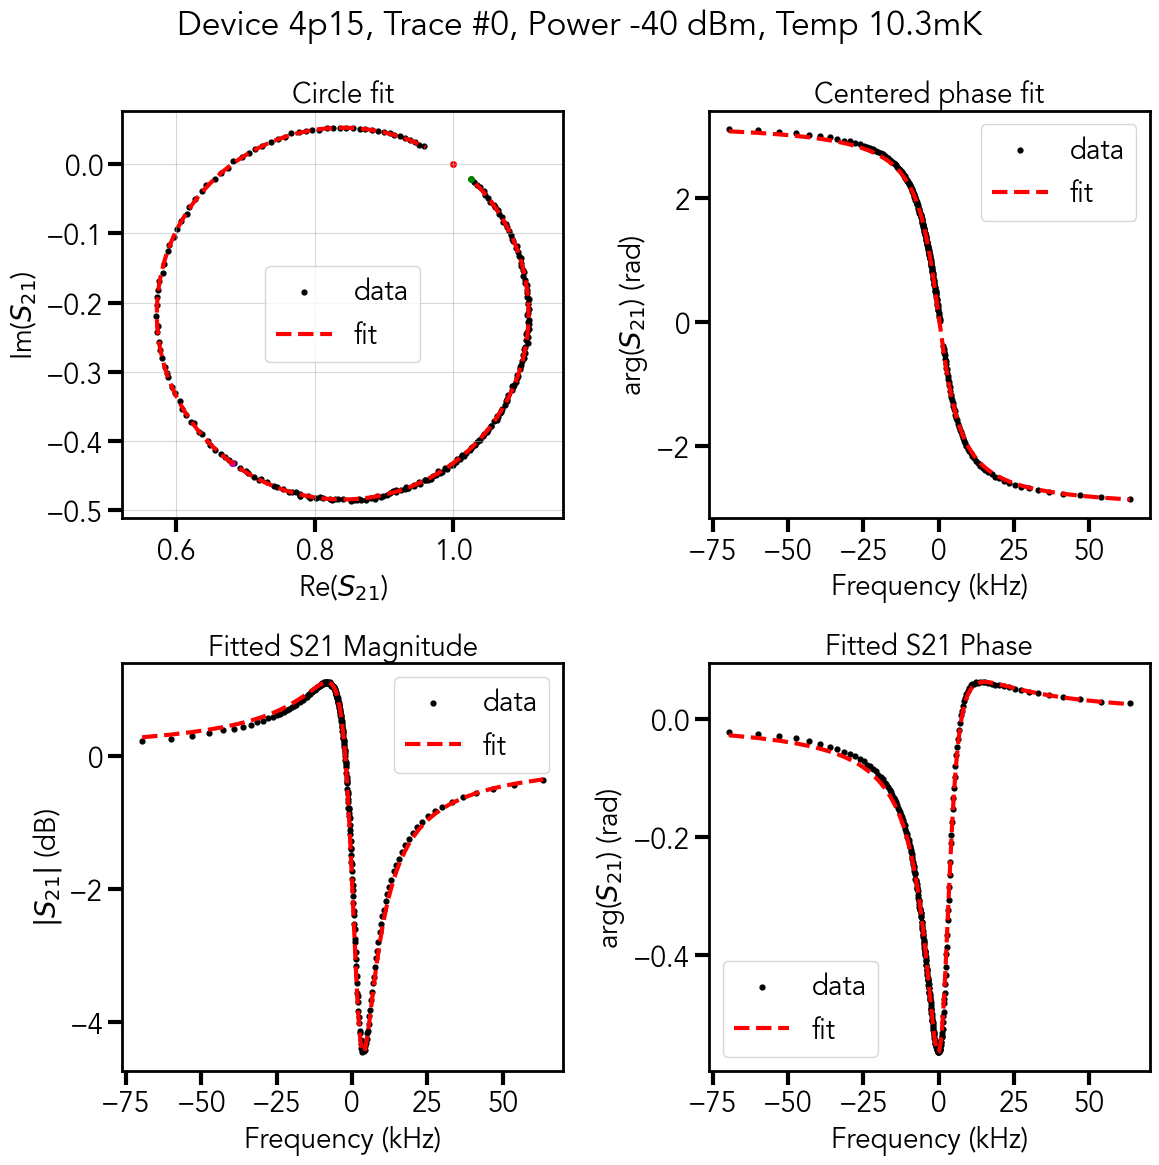

In [11]:
for trace in traces:
    plot_title = f"Device {trace.resonator_name}, Trace #{trace.id}, Power {trace.power} dBm, Temp {trace.temperature * 1e3:.1f}mK"
    fit_s21_v2(trace, plot_title=plot_title)

Exclude traces

In [12]:
traces_to_exclude = []
for trace in traces:
    if trace.id in traces_to_exclude:
        trace.is_excluded = True
    else:
        trace.is_excluded = False

Save fitted traces

In [13]:
save_traces(traces, output_file)